In [145]:
import pandas as pd
import matplotlib.pyplot as plt

# Import datasets
nba_attendance = pd.read_csv("Datasets/NBA_Attendance_2019-2023.csv")
wnba_game_attendance = pd.read_csv("Datasets/WNBA Game Attendance.csv")

In [146]:
# Lists of teams we're considering
wnba_teams = ['Atlanta Dreams','Chicago Sky','Dallas Wings','Indiana Fever','Los Angeles Sparks','Phoenix Mercury','Minnesota Lynx','New York Liberty','Las Vegas Aces','Seattle Storm']
nba_teams = ['Atlanta Hawks','Chicago Bulls','Dallas Mavericks','Indiana Pacers','Los Angeles Lakers','Phoenix Suns','Minnesota Timberwolves','New York Knicks','Golden State Warriors','Oklahoma City Thunder']

In [149]:
# Remove rows with no attendance data
wnba_game_attendance.dropna(subset = ["Attendance"], inplace = True)

In [150]:
# Drop duplicate rows
wnba_game_attendance.drop_duplicates(["Year","Date","Location","Attendance"], inplace = True)

In [151]:
# Create dictionary with all games each team played
wnba_team_data = {}
for team in wnba_teams:
    wnba_team_data[team] = wnba_game_attendance.loc[(wnba_game_attendance["Team"] == team) | (wnba_game_attendance["Opponent"] == team)]
    
# Create new dataframe to mat
columns = ["Year",
           "Team",
           "Overall Games",
           "Overall Average",
           "Overall Percent"]

wnba_attendance = pd.DataFrame(columns = columns)
# Go through each team
for team in wnba_team_data:
    team_data = wnba_team_data[team]
    
    # For each team, go through years 2019-2023
    for year in range(2019, 2024):
        cap_sum = 0
        
        # All games that this team played in year
        year_games = team_data[team_data["Year"] == year]
        num_games = year_games.size
        avg_attendance = year_games["Attendance"].mean()
        percent_attendance = year_games["Attendance"].sum() * 100 / year_games["Venue Capacity"].sum()
                
        team_year_data = [year,
                          team,
                          num_games,
                          round(avg_attendance,0),
                          round(percent_attendance,1)]
        
        team_year_data_df = pd.DataFrame([team_year_data], columns = columns)
        
        wnba_attendance = pd.concat([wnba_attendance, team_year_data_df], ignore_index = True)

C:\Users\skp95\AppData\Local\Temp\ipykernel_3424\978034009.py:26: RuntimeWarning: invalid value encountered in scalar divide
  percent_attendance = year_games["Attendance"].sum() * 100 / year_games["Venue Capacity"].sum()
C:\Users\skp95\AppData\Local\Temp\ipykernel_3424\978034009.py:26: RuntimeWarning: invalid value encountered in scalar divide
  percent_attendance = year_games["Attendance"].sum() * 100 / year_games["Venue Capacity"].sum()
C:\Users\skp95\AppData\Local\Temp\ipykernel_3424\978034009.py:26: RuntimeWarning: invalid value encountered in scalar divide
  percent_attendance = year_games["Attendance"].sum() * 100 / year_games["Venue Capacity"].sum()
C:\Users\skp95\AppData\Local\Temp\ipykernel_3424\978034009.py:26: RuntimeWarning: invalid value encountered in scalar divide
  percent_attendance = year_games["Attendance"].sum() * 100 / year_games["Venue Capacity"].sum()
C:\Users\skp95\AppData\Local\Temp\ipykernel_3424\978034009.py:26: RuntimeWarning: invalid value encountered in s

In [115]:
# Clean resultant dataframe
wnba_attendance.dropna(inplace = True)

In [152]:
wnba_attendance

,Year,Team,Overall Games,Overall Average,Overall Percent
0,2019,Atlanta Dreams,0,NaN,NaN
1,2020,Atlanta Dreams,0,NaN,NaN
2,2021,Atlanta Dreams,144,2067.0,30.7
3,2022,Atlanta Dreams,344,4312.0,53.0
4,2023,Atlanta Dreams,120,4247.0,58.1
5,2019,Chicago Sky,168,6344.0,57.9
6,2020,Chicago Sky,0,NaN,NaN
7,2021,Chicago Sky,16,1064.0,10.2
8,2022,Chicago Sky,32,6380.0,74.3
9,2023,Chicago Sky,16,5236.0,77.0


In [153]:
rankings = {2019:['Washington Mystics','Conneticut Sun','Los Angeles Sparks','Las Vegas Aces','Chicago Sky','Seattle Storm','Minnesota Lynx','Phoenix Mercury','Indiana Fever','Dallas Wings','New York Liberty','Atlanta Dreams'], 2020: ['Las Vegas Aces','Seattle Storm','Los Angeles Sparks','Minnesota Lynx','Phoenix Mercury','Chicago Sky','Conneticut Sun','Washington Mystics','Dallas Wings','Atlanta Dreams','Indiana Fever','New York Liberty'], 2021: ['Conneticut Sun','Las Vegas Aces','Minnesota Lynx','Seattle Storm','Phoenix Mercury','Chicago Sky','Dallas Wings','New York Liberty','Washington Mystics','Los Angeles Sparks','Atlanta Dream','Indiana Fever'], 2022: ["Las Vegas Aces",'Chicago Sky','Conneticut Sun','Seattle Storm','Washington Mystics','Dallas Wings','New York Liberty','Phoenix Mercury','Minnesota Lynx','Atlanta Dreams','Los Angeles Sparks','Indiana Fever'], 2023: ['Las Vegas Aces','New York Liberty','Conneticut Sun','Dallas Wings','Atlanta Dreams','Minnesota Lynx','Washington Mystics','Chicago Sky','Los Angeles Sparks','Phoenix Mercury','Seattle Storm','Indiana Fever']}

In [154]:
wnba_attendance[wnba_attendance["Overall Percent"] > 100]

,Year,Team,Overall Games,Overall Average,Overall Percent


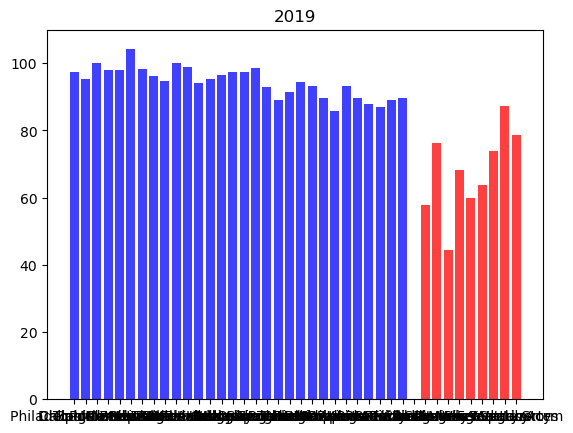

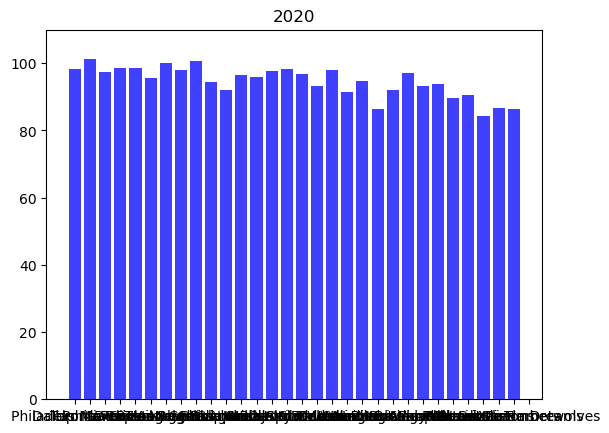

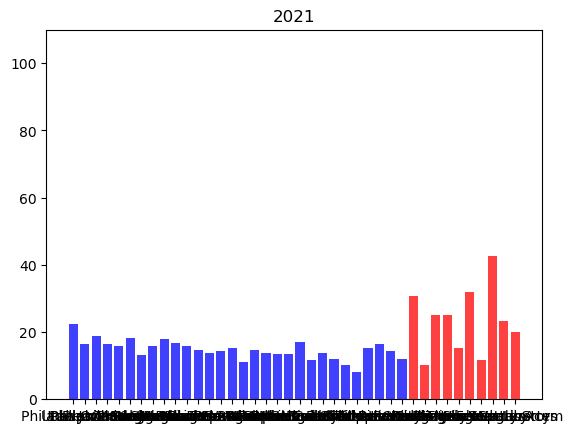

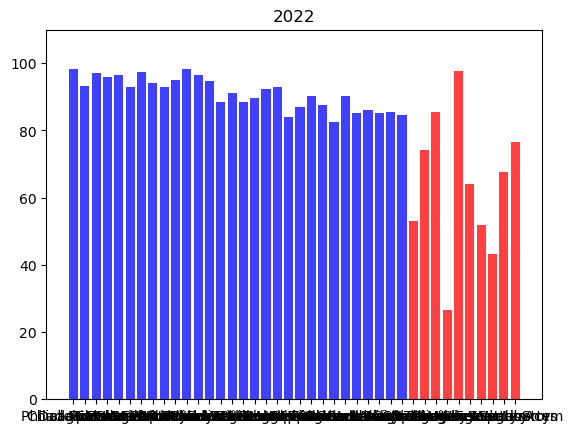

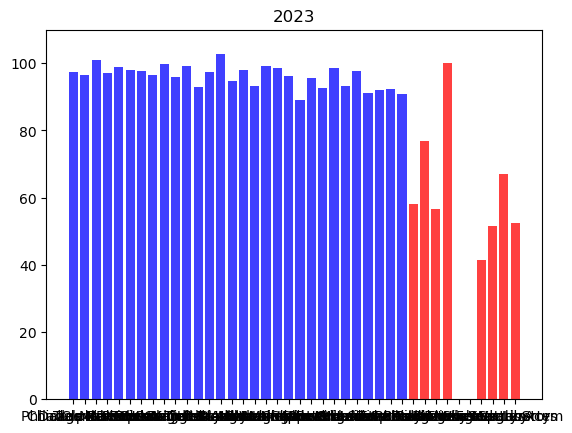

In [168]:
for year in range(2019,2024):
    plt.figure()
    nba_teams = nba_attendance[nba_attendance["Year"] == year]["Team"]
    nba_overall_percent = nba_attendance[nba_attendance["Year"] == year]["Overall Percent"]
    nba_overall_average = nba_attendance[nba_attendance["Year"] == year]["Overall Average"]
    
    wnba_teams = wnba_attendance[wnba_attendance["Year"] == year]["Team"]
    wnba_overall_percent = wnba_attendance[wnba_attendance["Year"] == year]["Overall Percent"]
    wnba_overall_average = wnba_attendance[wnba_attendance["Year"] == year]["Overall Average"]
    
    plt.bar(nba_teams, nba_overall_percent, color = "blue", alpha = .75)
    plt.bar(wnba_teams, wnba_overall_percent, color = "red", alpha = .75)
    plt.ylim(0,110)
    plt.title(f"{year}")
    plt.show
    plt.savefig(f"./graph_outputs/attendance_percentage_{year}.png")